In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
from sklearn import linear_model

In [2]:
car=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
car.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [8]:
car.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool

In [9]:
car.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
cars = car.sort_values(by='name').reset_index(drop=True)

In [11]:
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
1,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner
4,Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner
...,...,...,...,...,...,...,...,...
4335,Volkswagen Vento Petrol Highline AT,2011,300000,70000,Petrol,Individual,Automatic,Third Owner
4336,Volvo V40 D3 R Design,2018,1975000,21000,Diesel,Dealer,Automatic,First Owner
4337,Volvo XC 90 D5 Inscription BSIV,2017,4500000,80000,Diesel,Individual,Automatic,First Owner
4338,Volvo XC60 D3 Kinetic,2012,1750000,115992,Diesel,Dealer,Automatic,Third Owner


In [12]:
car.min()

name             Ambassador CLASSIC 1500 DSL AC
year                                       1992
selling_price                             20000
km_driven                                     1
fuel                                        CNG
seller_type                              Dealer
transmission                          Automatic
owner                               First Owner
dtype: object

In [13]:
car.max()

name             Volvo XC60 D5 Inscription
year                                  2020
selling_price                      8900000
km_driven                           806599
fuel                                Petrol
seller_type               Trustmark Dealer
transmission                        Manual
owner                          Third Owner
dtype: object

In [46]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [47]:
car.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<AxesSubplot:>

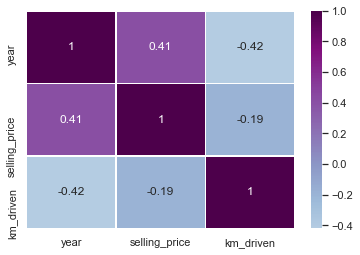

In [52]:
corr=car.corr()
sns.heatmap(data=corr,annot=True,cmap='BuPu',linewidths=.5,center=0)

In [14]:
car.name.unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [15]:
car.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [16]:
car.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
car.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [18]:
car.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [19]:
car['name'].value_counts()

Maruti Swift Dzire VDI              69
Maruti Alto 800 LXI                 59
Maruti Alto LXi                     47
Maruti Alto LX                      35
Hyundai EON Era Plus                35
                                    ..
Toyota Corolla AE                    1
Maruti A-Star AT VXI                 1
Hyundai Santro GLS I - Euro II       1
Tata Indigo LS Dicor                 1
Maruti Alto K10 LXI CNG Optional     1
Name: name, Length: 1491, dtype: int64

In [20]:
car.groupby('name').count().head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Ambassador CLASSIC 1500 DSL AC,2,2,2,2,2,2,2
Ambassador Classic 2000 Dsz,1,1,1,1,1,1,1
Ambassador Grand 1800 ISZ MPFI PW CL,1,1,1,1,1,1,1
Audi A4 1.8 TFSI,1,1,1,1,1,1,1
Audi A4 2.0 TDI,1,1,1,1,1,1,1
Audi A4 2.0 TDI 177 Bhp Premium Plus,2,2,2,2,2,2,2
Audi A4 3.0 TDI Quattro,12,12,12,12,12,12,12
Audi A4 30 TFSI Technology,2,2,2,2,2,2,2
Audi A4 35 TDI Premium,1,1,1,1,1,1,1


In [21]:
top_cars=car['name'].value_counts()[:10]

In [22]:
top_cars

Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Maruti Alto LX              35
Hyundai EON Era Plus        35
Maruti Swift VDI BSIV       29
Maruti Wagon R VXI BS IV    29
Maruti Swift VDI            27
Hyundai EON Magna Plus      24
Maruti Wagon R LXI Minor    24
Name: name, dtype: int64

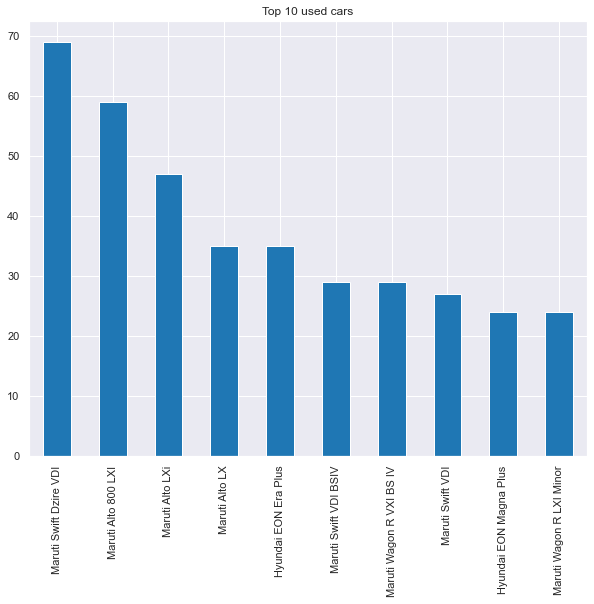

In [23]:
# plot top 10 cars used
top_cars.plot(kind='bar',figsize=(10,8),title='Top 10 used cars',color='#1f77b4')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


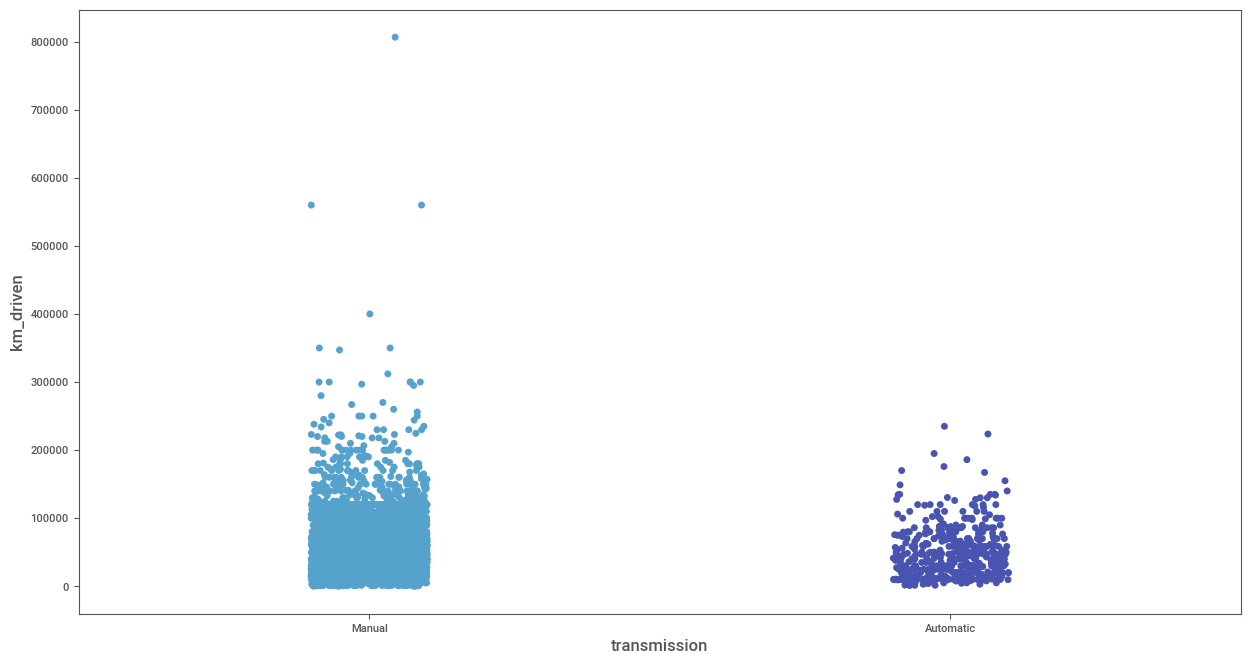

In [206]:
sns.stripplot(car['transmission'],car['km_driven'])
plt.show()

<AxesSubplot:xlabel='selling_price', ylabel='fuel'>

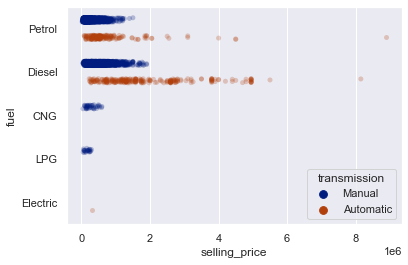

In [30]:
sns.stripplot(x="selling_price", y="fuel", hue="transmission",
              data=car, dodge=True, alpha=.25, zorder=1,palette="dark")

In [32]:
car['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

<AxesSubplot:title={'center':'Owner Types'}>

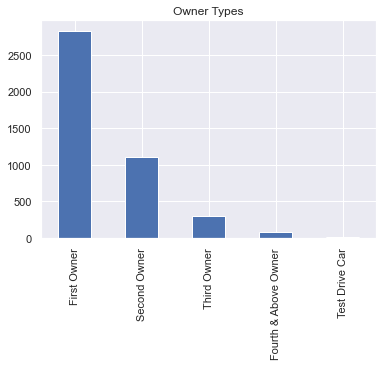

In [38]:
car['owner'].value_counts().plot(kind="bar", title="Owner Types")

In [39]:
car['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

<AxesSubplot:title={'center':'Owner Types'}>

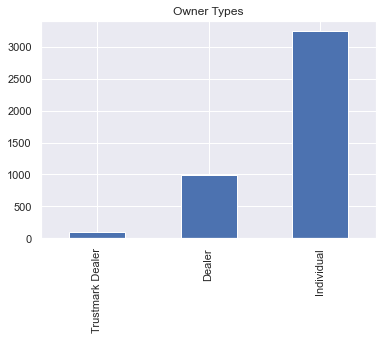

In [42]:
car['seller_type'].value_counts().sort_values().plot(kind="bar", title="Owner Types")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


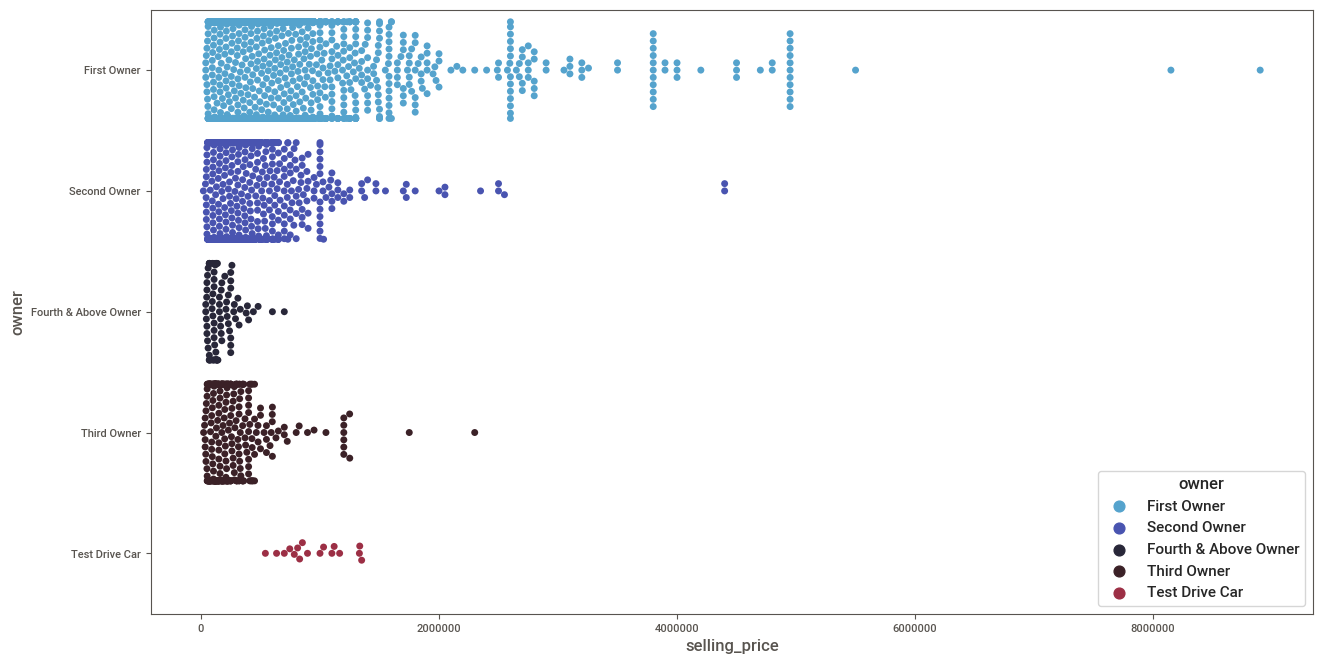

In [188]:
a = sns.swarmplot(data=car, x="selling_price", y="owner", hue="owner")

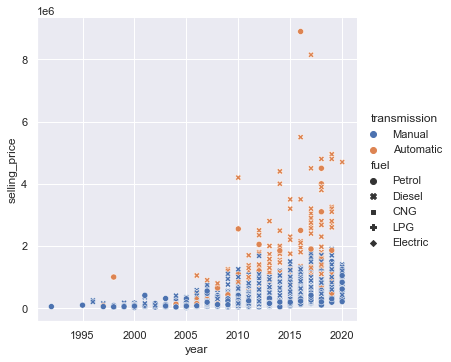

In [61]:
sns.relplot(x='year',y='selling_price',hue='transmission',style='fuel',data=car)
sns.set(rc={'figure.figsize':(15.7,8.27)})
plt.show()

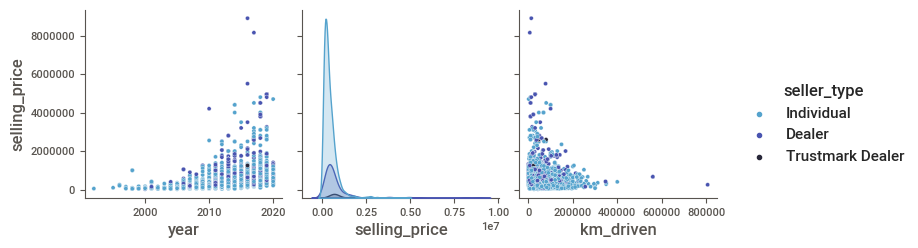

In [185]:
sns.set_palette("icefire")
sns.pairplot(car,hue='seller_type',y_vars=['selling_price'])

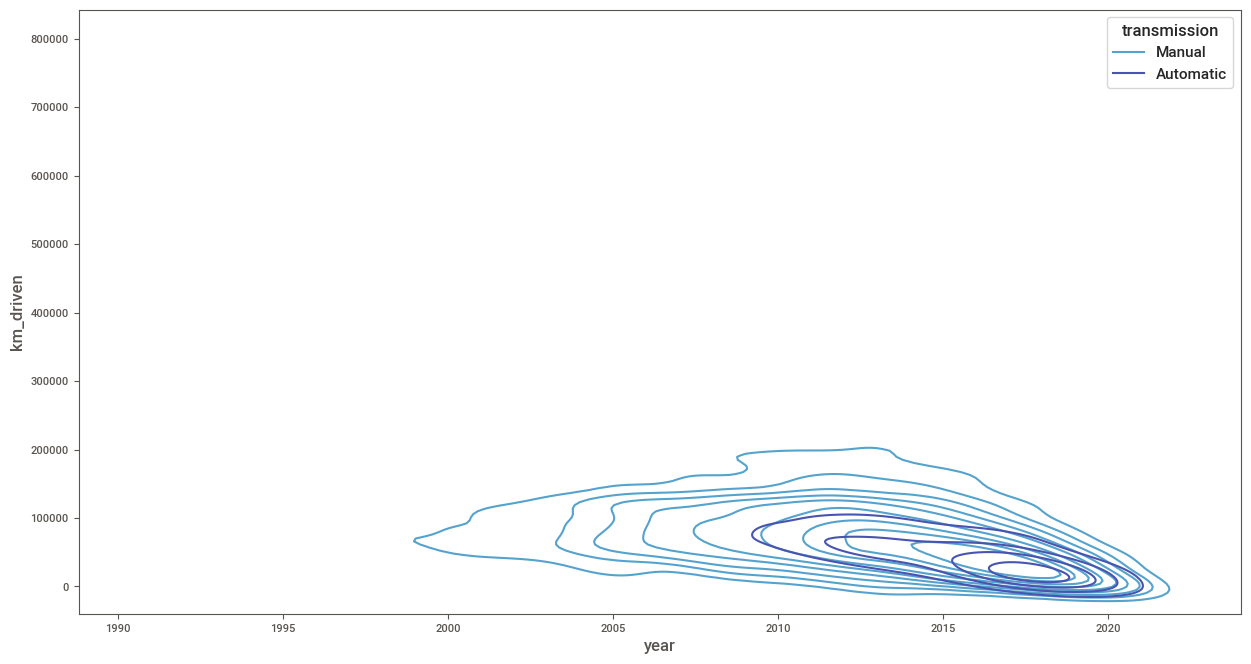

In [216]:

sns.kdeplot(data=car,x='year',y="km_driven",hue="transmission",thresh=.1,)
sns.color_palette("viridis")
plt.show()

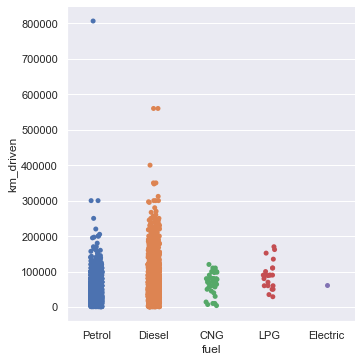

In [66]:
sns.catplot(x='fuel',y='km_driven',data=car)
plt.show()

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

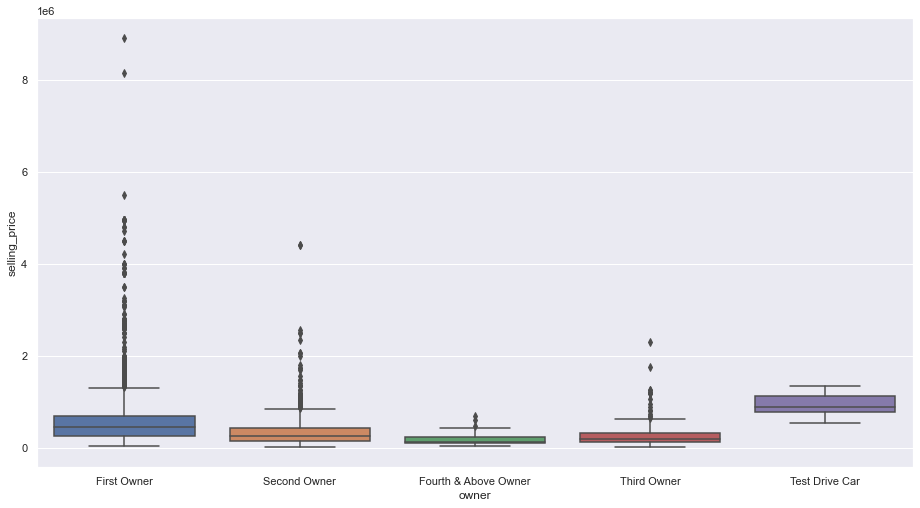

In [67]:
sns.boxplot(x='owner',y='selling_price',data=car)

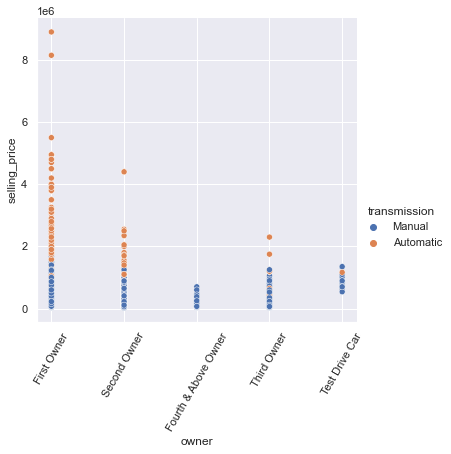

In [82]:
sns.relplot(x='owner',y='selling_price',hue='transmission',data=car)
plt.rcParams['figure.figsize']=(10,6)
plt.xticks(rotation=60)
plt.show()

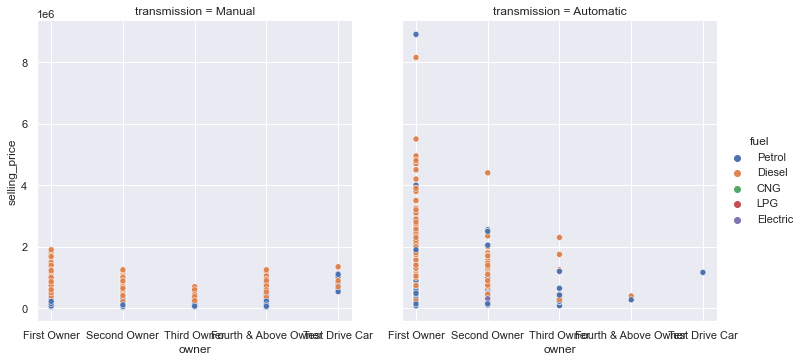

In [87]:
sns.relplot(x='owner',y='selling_price',hue='fuel',col='transmission',data=car)
plt.rcParams['figure.figsize']=(15,8)
plt.show()

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

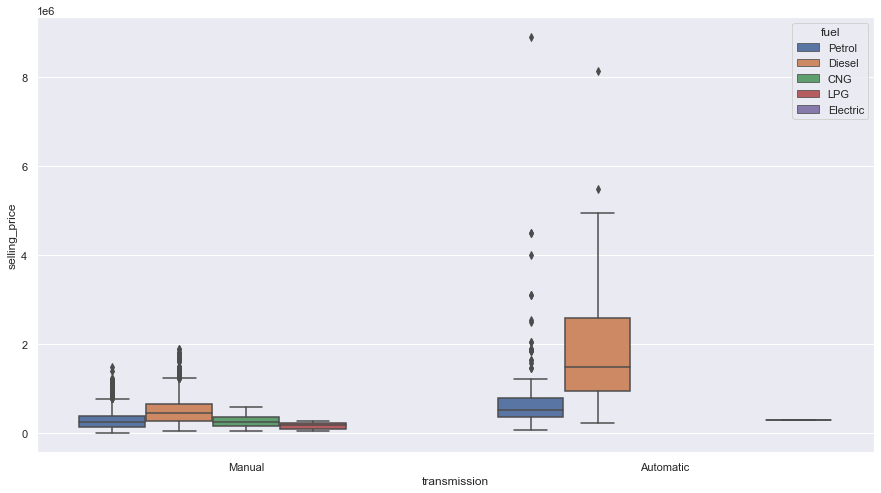

In [89]:
sns.boxplot(x='transmission',y='selling_price',hue='fuel',data=car)

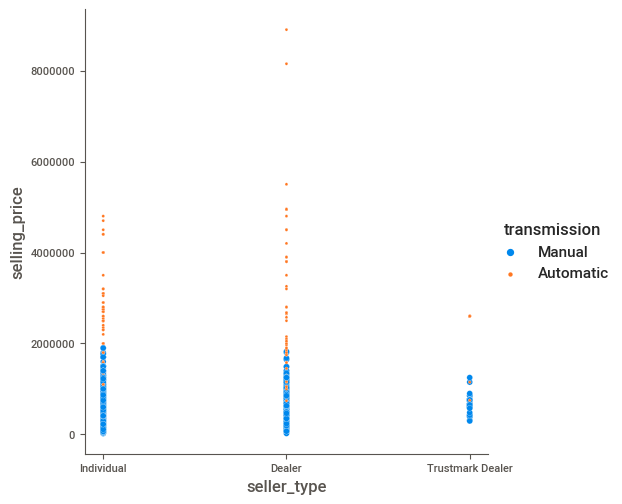

In [95]:
g = sns.relplot(data=car,x="seller_type", y="selling_price", hue="transmission", size="transmission")

In [91]:
#Automated EDA
import sweetviz as sv

In [92]:
sv.analyze(car).show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


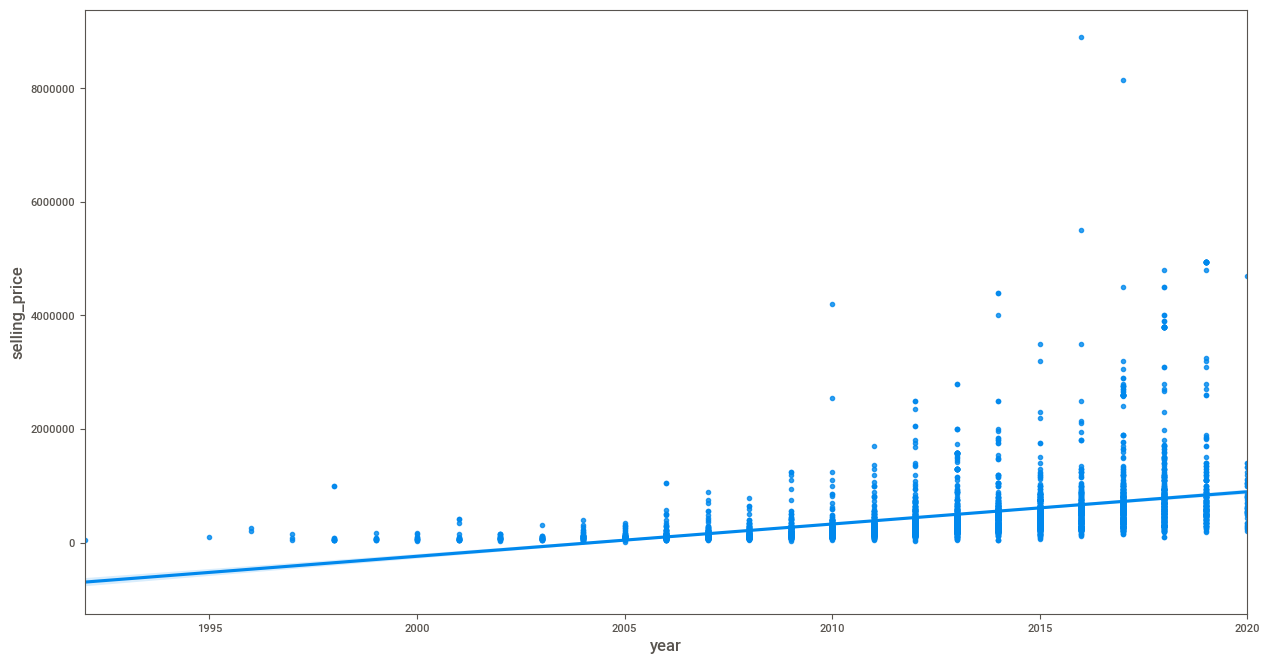

In [157]:
sns.regplot(x='year',y='selling_price',data=car)
plt.show()

#### Simple Linear Regression

In [158]:
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [161]:
model_df=car[['selling_price','year']]

In [165]:
model_df.sort_values(by='year').reset_index(drop=True)

,selling_price,year
0,50000,1992
1,95000,1995
2,200000,1996
3,250000,1996
4,150000,1997
...,...,...
4335,550000,2020
4336,640000,2020
4337,828999,2020
4338,282000,2020


In [166]:
x=model_df.year
x

0       2007
1       2007
2       2012
3       2017
4       2014
        ... 
4335    2014
4336    2014
4337    2009
4338    2016
4339    2016
Name: year, Length: 4340, dtype: int64

In [167]:
y=model_df.selling_price
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [168]:
model=linear_model.LinearRegression()

In [169]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [170]:
model.intercept_

-113859643.90569904

In [171]:
model.coef_

array([56810.04163345])

In [172]:
model.score(np.array(x).reshape(-1,1),y)

0.1713311570174394

#### Multiple linear Regression

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
car.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [127]:
x=car[['year','km_driven']]
y=car[['selling_price']]

In [128]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [130]:
model1=linear_model.LinearRegression()

In [131]:
model1.fit(x_train,y_train)

LinearRegression()

In [132]:
model1.intercept_

array([-1.10979899e+08])

In [133]:
model1.coef_

array([[ 5.53886393e+04, -3.05571436e-01]])

In [134]:
model1.predict(x_test)

array([[326819.95142193],
       [841512.99090612],
       [227739.03076835],
       ...,
       [379152.87632002],
       [724774.93037315],
       [732874.71243711]])

In [137]:
y_test.values

array([[165000],
       [250000],
       [120000],
       ...,
       [350000],
       [600000],
       [540000]], dtype=int64)

In [141]:
model1.score(x_test,model1.predict(x_test))

1.0

In [143]:
model1.score(x_train,model1.predict(x_train))

1.0

In [186]:
model1.score(x_test,y_test)

0.16862361282554916

In [145]:
model1.score(x_train,y_train)

0.1732996657894914

The assumptions of linear regression is not met.

#### Statsmodels

In [197]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [198]:
X = car[['year','km_driven']] 
Y = car['selling_price']

In [229]:
model3 = car[['selling_price','year']]
model3.head()

y = model3.selling_price
x = model3.year

x = sm.add_constant(x) 

m3 = sm.OLS(y, x).fit()
predictions = m3.predict(x) 
print_model = m3.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     896.9
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          2.72e-179
Time:                        23:56:15   Log-Likelihood:                -63334.
No. Observations:                4340   AIC:                         1.267e+05
Df Residuals:                    4338   BIC:                         1.267e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.139e+08   3.82e+06    -29.816      0.0

In [228]:
model4 = car[['year','km_driven','selling_price']]
model4.head()
x = car.loc[:,['year','km_driven']].values
y = car.loc[:,'selling_price'].values.reshape(-1,1)

x = sm.add_constant(x) 
m4 = sm.OLS(y, x).fit()
predictions = m4.predict(x) 
print_model = m4.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     449.7
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          3.41e-178
Time:                        23:56:06   Log-Likelihood:                -63333.
No. Observations:                4340   AIC:                         1.267e+05
Df Residuals:                    4337   BIC:                         1.267e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.112e+08   4.21e+06    -26.408      0.0